In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def draw_arc(x, y, r, phi1, phi2, axs, **kwargs):
    
    theta = np.arctan2(y, x) + np.pi
    phi = np.linspace(theta - phi1, theta + phi2, 1000)
    plt.plot(x + r * np.cos(phi), y + r * np.sin(phi), **kwargs)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    return theta

def draw_line(x0, y0, theta, axs, **kwargs):
    x = np.linspace(-5, 5, 1000)
    plt.plot(x0 + x * np.cos(theta), y0 + x * np.sin(theta))
    
def draw_circle(x, y, r, axs, **kwargs):
    draw_arc(x, y, r, 0, 2*np.pi, axs, **kwargs)
    
def draw(xx, yy, rr, pphi):
    
    fig, axs = plt.subplots(figsize=(10, 10))
    axs.set_xlim(-2.5, 2.5)
    axs.set_ylim(-2.5, 2.5)
    for x, y, r, phi in zip(xx, yy, rr, pphi):
        draw_circle(x, y, r, axs, linewidth=3, color='k', alpha=0.3)
        for p1, p2 in phi:
            draw_arc(x, y, r, p1, p2, axs, linewidth=3, color='r', alpha=1)
    return axs

In [3]:
def intersection_angles_cosine(Rm, Rp, bm, bp, bpm):
    
    delta = bm*bpm**2*Rm*np.sqrt(((bm - bp - bpm)*(bm + bp - bpm)*(bm - bp + bpm)
                                  *(bm + bp + bpm)*(bpm - Rm - Rp)*(bpm + Rm - Rp)
                     *(bpm - Rm + Rp)*(bpm + Rm + Rp))/(bm**2*bpm**4*Rm**2))
    gamma = bm**2*(bpm**2 + Rm**2 - Rp**2) + (-bp**2 + bpm**2)*(bpm**2 + Rm**2 - Rp**2)
    cosphi2 = (gamma - delta) / (4.*bm*bpm**2*Rm)
    cosphi1 = (gamma + delta) / (4.*bm*bpm**2*Rm)
    
    phi1 = np.arccos(cosphi1)
    phi2 = np.arccos(cosphi2)
    
    # s and t determine which solution (positive or negative yp) each 
    # angle belongs to. If t is positive, then phi2 belongs to the negative yp solution 
    # and it needs it's sign reversed. Then, if s is positive, phi1 and phi2 belonged to the same 
    # signed yp solution so phi1 needs its sign reversed as well. If s is negative, then they belonged 
    # to opposite signed solutions before, so phi1 does not need to be modified (s * t is positive in 
    # this case, which leaves phi1 unchanged).
    
    s = np.sign((bm**4 + (bp**2 - bmp**2)**2 - 
                 (bm**2*(bmp**4 + 2*bp**2*rm**2 + rm**4 - 2*(bmp**2 + rm**2)*rp**2 + rp**4))/rm**2)
                /(4.*bm**2*bmp**2))
    t = np.sign(bmp - np.sqrt(-(bm**2*rm) + bp**2*rm - bm*rm**2 + bm*rp**2)/np.sqrt(bm + rm))
    phi1 = s * t * phi1
    phi2 = - t * phi2
    
    return phi1, phi2

# Note

correct intersections are found by using the cosine solution to locate the angles of the intersection and the sine solution to determine the sign of the angles about pi. 

-0.4380357585207402 -0.8078067632047581


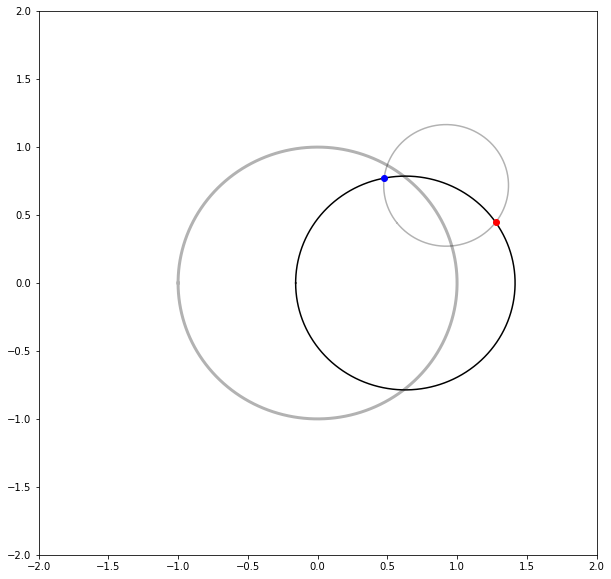

In [114]:
phi1 = np.nan
while np.isnan(phi1):
    xm, ym, rm = np.random.rand(), 0, np.random.rand() * 0.8
    xp, yp, rp = np.random.rand(), np.random.rand(), np.random.rand() * rm

    bm = np.sqrt(xm**2 + ym**2)
    bp = np.sqrt(xp**2 + yp**2)
    bmp = np.sqrt((xm-xp)**2 + (ym-yp)**2)

    phi1, phi2 = intersection_angles_cosine(rm, rp, bm, bp, bmp)

fig, axs = plt.subplots(figsize=(10, 10))
draw_circle(0, 0, 1, axs, color='k', alpha=0.3, linewidth=3)
draw_circle(xp, yp, rp, axs, color='k', alpha=0.3)
draw_circle(xm, ym, rm, axs, color='k', alpha=1)

axs.plot(xm + rm * np.cos(np.pi + phi1), ym + rm * np.sin(np.pi + phi1), 'bo')
axs.plot(xm + rm * np.cos(np.pi + phi2), ym + rm * np.sin(np.pi + phi2), 'ro')

print(phi1 / np.pi, phi2 / np.pi)

In [ ]:
bmp

In [ ]:
xp, yp, rp = 0.9, 0.0, 0.6
xm, ym, rm = 0.9, 0.7, 0.3

bm = np.sqrt(xm**2 + ym**2)
bp = np.sqrt(xp**2 + yp**2)
bmp = np.sqrt((xm-xp)**2 + (ym-yp)**2)
phi = phi_planet(rm, rp, bmp)
phistar = phi_star(rp, bp)

In [ ]:
fig, axs = plt.subplots(figsize=(10, 10))
draw_circle(0, 0, 1, axs, color='k', alpha=0.3, linewidth=3)
draw_circle(xp, yp, rp, axs, color='k', alpha=0.3)
draw_circle(xm, ym, rm, axs, color='k', alpha=0.3)

theta = np.arctan2(ym-yp, xm-xp)

axs.plot(xp + rp * np.cos(theta-phi), yp + rp * np.sin(theta-phi), 'ro')
axs.plot(xp + rp * np.cos(theta+phi), yp + rp * np.sin(theta+phi), 'bo')

axs.plot(xp + rp * np.cos(np.pi-phistar), yp + rp * np.sin(np.pi-phistar), 'r*')
axs.plot(xp + rp * np.cos(np.pi+phistar), yp + rp * np.sin(np.pi+phistar), 'b*')

In [ ]:
def configuration(xm, ym, rm, xp, yp, rp):
    
    bp2 = xp**2 + yp**2
    bm2 = xm**2 + ym**2
    bpm2 = (xp-xm)**2 + (yp-ym)**2
    bmp2 = bpm2
    bp = np.sqrt(bp2)
    bm = np.sqrt(bm2)
    bpm = np.sqrt(bpm2)
    bmp = bpm
        
    if bpm > rp + rm:
        if bp > rp + 1:
            if bm > rm + 1:
                print("neither planet nor moon overlap star")
            else:
                if bm + rm < 1:
                    print("moon completely overlaps star, planet is outside of star")
                else:
                    print("moon partially overlaps star, planet is outside of star")
        else:
            if bm > rm + 1:
                if bp + rp < 1:
                    print("planet completely overlaps star, moon is outside of star")
                else:
                    print("planet partially overlaps star, moon is outside of star")
            else:
                if bp + rp < 1:
                    if bm + rm < 1:
                        print("moon and planet both completely overlap star, they do not overlap each other")
                    else:
                        print("planet completely overlaps star, moon partially overlaps star, they do not overlap each other")
                else:
                    if bm + rm < 1:
                        print("planet partially overlaps star, moon fully overlaps star, they do not overlap each other")
                    else:
                        print("moon and planet both partially overlap star, but not each other")
    else:
        if bp > rp + 1:
            if bm > rm + 1:
                print("neither moon nor planet overlap star")
            else:
                if bm + rm < 1:
                    print("moon fully overlaps star, planet does not overlap star")
                else:
                    print("moon partially overlaps star, planet does not overlap star")
        else:
            if bm > rm + 1:
                if bp + rp < 1:
                    print("planet fully overlaps star, moon does not overlap star")
                else:
                    print("planet partially overlaps star, moon does not overlap star")
            else:
                if bp + rp < 1:
                    if bm + rm < 1:
                        if bpm + rm < rp:
                            print("moon and planet both fully overlap star, moon fully overlaps planet")
                        else:
                            print("moon and planet both fully overlap star and partially overlap each other")
                    else:
                        if bpm + rm < rp:
                            print("planet fully overlaps star, moon partially overlaps star, moon fully overlaps planet")
                        else:
                            print("planet fully overlaps star, moon partially overlaps star, planet and moon partially overlap each other")
                else:
                    if bm + rm < 1:
                        if bpm + rm < rp:
                            print("planet partially overlaps star, moon fully overlaps star, moon fully overlaps planet")
                        else:
                            print("planet partially overlaps star, moon fully overlaps star, planet and moon partially overlap each other")
                    else:
                        if bpm + rm < rp:
                            print("planet and moon both partially overlap star, moon fully overlaps planet")
                        else:
                            # this one has all the special cases 
                            
                            costhetapm = (bp2 + bm2 - bpm2) / (2 * bp * bm)
                            cosphim = (bm2 + 1 - rm**2) / (2 * bm)
                            cosphip = (bp2 + 1 - rp**2) / (2 * bp)
                            if np.arccos(costhetapm) + np.arccos(cosphim) < np.arccos(cosphip):
                                print("planet and moon both partially overlap star and each other, but moon/star overlap is entirely overlapped by planet/star overlap")
                            elif np.arccos(costhetapm) + np.arccos(cosphip) < np.arccos(cosphim):
                                print("planet and moon both partially overlap star and each other, but planet/star overlap is entirely overlapped by moon/star overlap.")
                            else:
                                costheta = (bmp2 + bm2 - bp2) / (2 * bmp * bm)
                                cosphim = (bmp2 + rm**2 - rp**2) / (2 * bmp * rm)
                                cosphi1 = np.cos(np.arccos(costheta) - np.arccos(cosphim))
                                cosphi2 = np.cos(np.arccos(costheta) + np.arccos(cosphim))
                                d1 = rm**2 + bm2 - 2 * rm * bm * cosphi1
                                d2 = rm**2 + bm2 - 2 * rm * bm * cosphi2
                                if d1 > 1:
                                    print("planet and moon both partially overlap star and each other, but the planet/moon overlap does not overlap the star.")
                                elif d2 < 1:
                                    print("planet and moon both partially overlap star and each other, with the planet/moon overlap fully overlapping the star.") 
                                else:
                                    print("planet and moon both partially overlap star and each other, with the planet/moon overlap partially overlapping the star.")

In [ ]:
xp, yp, rp = np.random.rand(1) * 2 - 1, np.random.rand(1) * 2 - 1, np.random.rand(1) 
xm, ym, rm = np.random.rand(1) * 2 - 1, np.random.rand(1) * 2 - 1, np.random.rand(1) * rp

#xp, yp, rp = 2, -0.5, 0.6
#xm, ym, rm = 0.9, 0, 0.35

for i in range(10):
    xp, yp, rp = np.random.rand(1) * 2 - 1, np.random.rand(1) * 2 - 1, np.random.rand(1) 
    xm, ym, rm = np.random.rand(1) * 2 - 1, np.random.rand(1) * 2 - 1, np.random.rand(1) * rp
    fig, axs = plt.subplots(figsize=(10, 10))
    draw_circle(0, 0, 1, axs, color='k', alpha=1, linewidth=1)
    draw_circle(xp, yp, rp, axs, color='r', alpha=0.5)
    draw_circle(xm, ym, rm, axs, color='b', alpha=0.5)
    configuration(xm, ym, rm, xp, yp, rp)
#axs.set_xlim(0.5, 1.5)
#axs.set_ylim(-0.5, 0.5)

In [ ]:
args1 = np.random.rand(100)
args2 = np.random.rand(100)
%timeit np.cos(np.arccos(args1) - np.arccos(args2))

In [ ]:
args = np.random.rand(100)
args = np.random.rand(100)
%timeit args1*args2 - np.sqrt(1 - args1**2)*np.sqrt(1 - args2**2)